In [1]:
#Loading in required libraries for code

#Common libraries
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries needed to analyze data
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, normalize
from imblearn.over_sampling import SMOTE
from scipy import ndimage

#Model Building with Knn, Perception, and Logistic
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


#Plotting with taste
sns.set_theme()
sns.set_context("poster")
plt.style.use('fivethirtyeight')

In [2]:
#Loading in the train and testing data sets from kaggle

test_data = pd.read_csv('../exoTest.csv')
train_data = pd.read_csv('../exoTrain.csv')

In [3]:
#The Labels are 2 for exoplanet and 1 for non exoplanet so we have to switch them to 2->1 and 1->0

new_labels_test = []
for i in test_data['LABEL']:
    if i == 2:
        new_labels_test.append(1)
        
    if i == 1:
        new_labels_test.append(0)

test_data = test_data.drop(columns= ['LABEL'])
test_data.insert(0, 'NEW_LABEL', new_labels_test)

In [4]:
#For both datasets

new_labels_train = []
for i in train_data['LABEL']:
    if i == 2:
        new_labels_train.append(1)
        
    if i == 1:
        new_labels_train.append(0)

train_data = train_data.drop(columns= ['LABEL'])
train_data.insert(0, 'NEW_LABEL', new_labels_train)

In [5]:
train_data

,NEW_LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,0,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,0,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,0,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,0,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [6]:
train_data.describe()

,NEW_LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,0.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,0.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,0.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,0.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,0.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,1.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


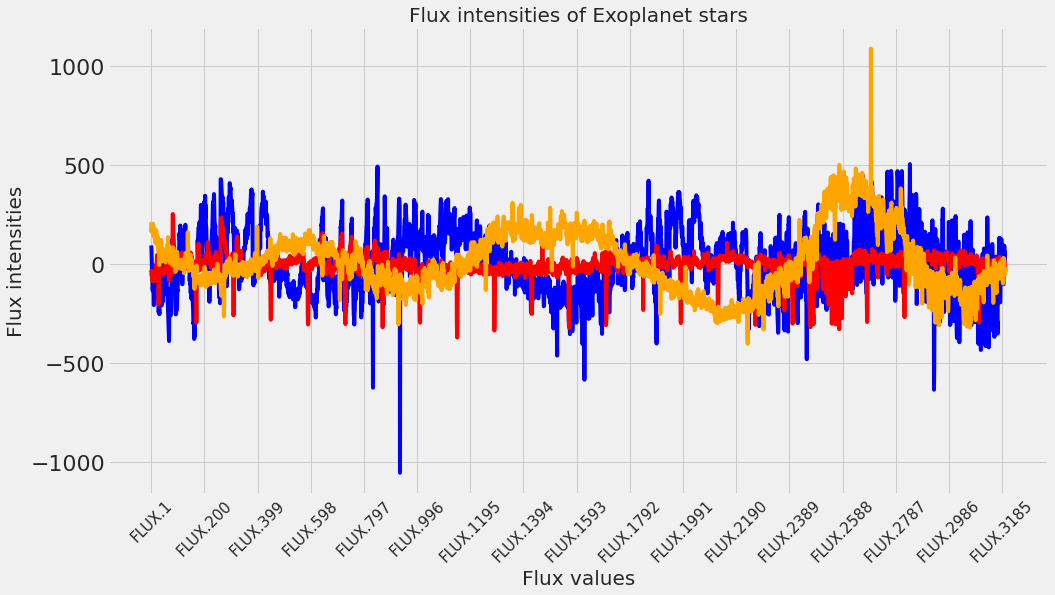

In [7]:
#Observing the intensity of flux values from training data of exoplanets vs non exoplanets 3 of each

plt.figure(figsize = (15,8))
plt.title('Flux intensities of Exoplanet stars', size = 20)

#Exoplanet ones
plt.plot(train_data.iloc[0,1:], color = 'blue')
plt.plot(train_data.iloc[1,1:], color = 'red')
plt.plot(train_data.iloc[5,1:], color = 'orange')

plt.xlabel('Flux values', size = 20)
plt.ylabel('Flux intensities', size = 20)
plt.xticks(rotation = 45, ticks = np.arange(0,3197,199), size = 15)

plt.show()

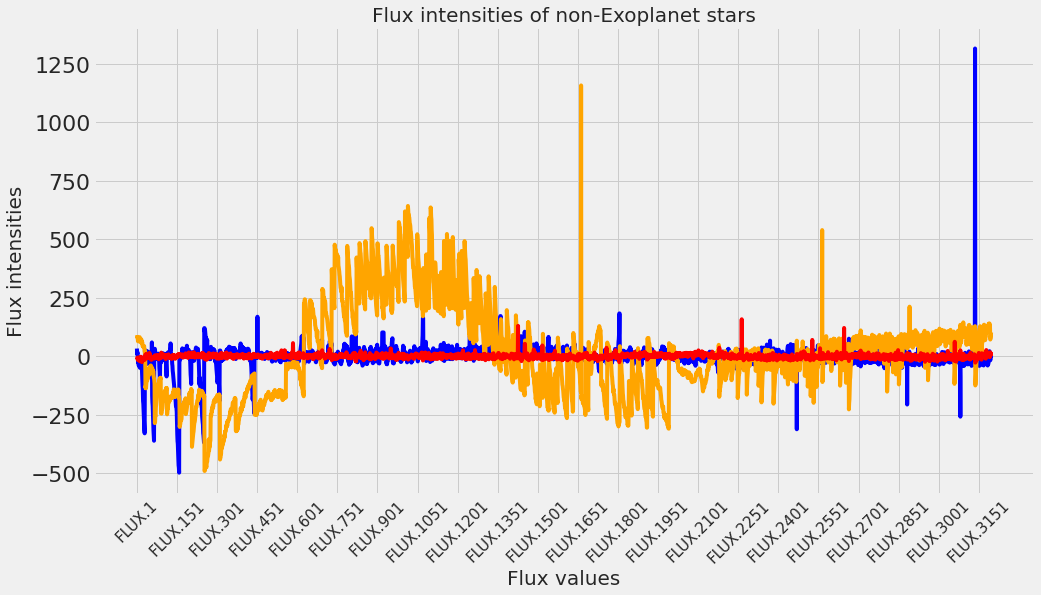

In [8]:
plt.figure(figsize = (15,8))
plt.title('Flux intensities of non-Exoplanet stars', size=20)

plt.plot(train_data.iloc[211,1:], color = 'blue')
plt.plot(train_data.iloc[400,1:], color = 'orange')
plt.plot(train_data.iloc[500,1:], color = 'red')

plt.xlabel('Flux values', size = 20)
plt.ylabel('Flux intensities', size = 20)
plt.xticks(rotation = 45, ticks = np.arange(0,3197,150), size = 15)
plt.show()

Text(0.5, 1.0, 'Flux.1 data points')

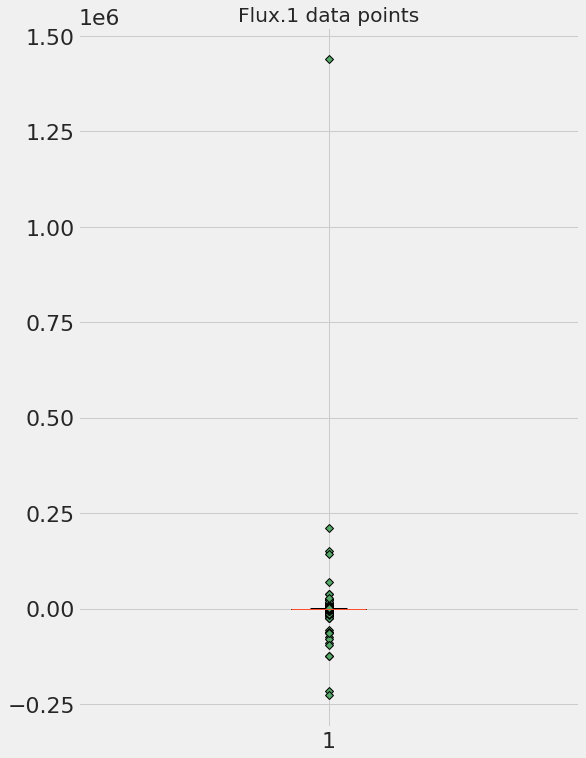

In [9]:
plt.figure(figsize = (8,12))

flux_one=train_data['FLUX.1']

green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(flux_one, flierprops= green_diamond)
plt.title('Flux.1 data points')

In [10]:
#Dropping Outliers

train_data.drop(train_data[train_data['FLUX.1']>250000].index, axis=0, inplace=True)

Text(0.5, 1.0, 'Flux.1 data points')

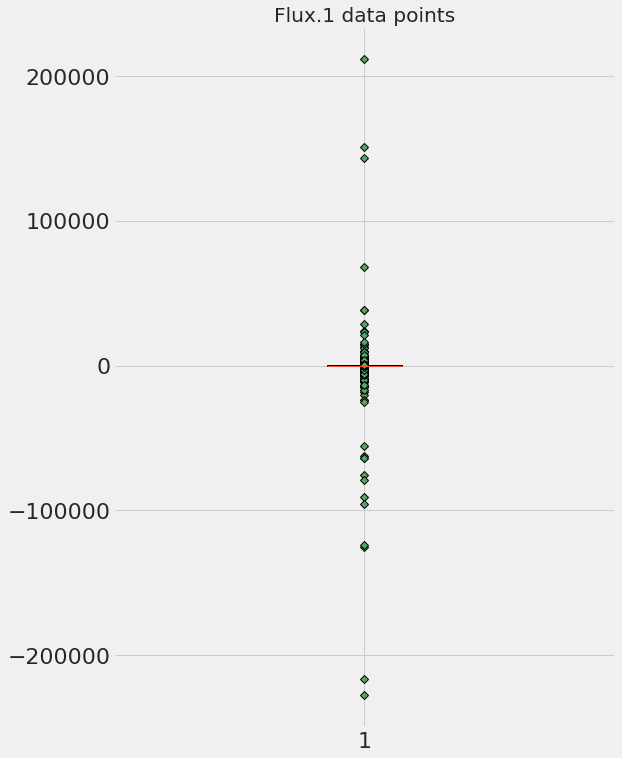

In [11]:
plt.figure(figsize = (8,12))

flux_one=train_data['FLUX.1']

green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(flux_one, flierprops= green_diamond)
plt.title('Flux.1 data points')

## Setting up train/test split for machine learning

In [12]:
#Splitting the data into labels and features for both training and testing sets

train_fluxes = train_data.drop(columns = ['NEW_LABEL'],axis=1)

train_labels = train_data['NEW_LABEL']

test_fluxes = test_data.drop(columns = ['NEW_LABEL'],axis=1)

test_labels = test_data['NEW_LABEL']

In [13]:
#Normalizing the data

train_fluxes = normalized = normalize(train_fluxes)
test_fluxes = normalize(test_fluxes)

In [14]:
#Applying Guassian Filter

train_fluxes = ndimage.filters.gaussian_filter(train_fluxes, sigma = 10)

test_fluxes = ndimage.filters.gaussian_filter(test_fluxes, sigma = 10)

In [15]:
#Feature Scaling

std_scaler = StandardScaler()
train_fluxes = scaled = std_scaler.fit_transform(train_fluxes)
test_fluxes = std_scaler.fit_transform(test_fluxes)

# Apply Various Algorithms

## K Closest Neighbors

Score: 0.9912280701754386%


Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



/home/shield94/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shield94/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shield94/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


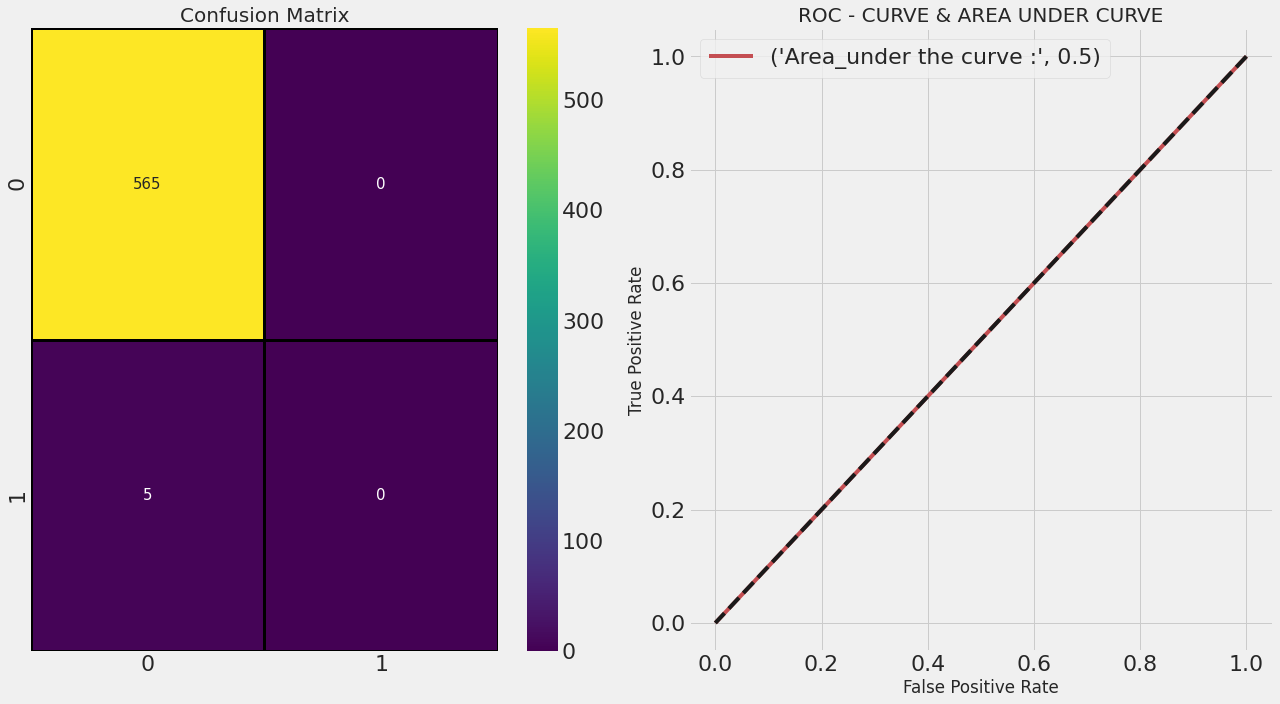

In [16]:
#K closest neighbors
knn_model = KNeighborsClassifier()
knn_results = knn_model.fit(train_fluxes,train_labels)

knn_prediction = knn_results.predict(test_fluxes)

print(f"Score: {knn_results.score(test_fluxes,test_labels)}%\n")
print ("\nClassification report :\n",(classification_report(test_labels,knn_prediction)))

#Plotting Results

fig, axs = plt.subplots(figsize = (18,10),ncols=2)

sns.heatmap(confusion_matrix(test_labels,knn_prediction), cmap = "viridis", annot = True,fmt = "d",
            annot_kws = {'size':15},linewidths=3,linecolor="black", ax = axs[0])
axs[0].set_title("Confusion Matrix", size = 20)

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_model.predict_proba(test_fluxes)[:,1]
fpr,tpr,thresholds = roc_curve(test_labels,predicting_probabilites)
axs[1].plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
axs[1].plot([1,0],[1,0],linestyle = "dashed",color ="k")
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

plt.legend()
plt.tight_layout()

## Decision Tree Classifier

Score: 0.9614035087719298%


Classification report :
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       565
           1       0.00      0.00      0.00         5

    accuracy                           0.96       570
   macro avg       0.50      0.48      0.49       570
weighted avg       0.98      0.96      0.97       570



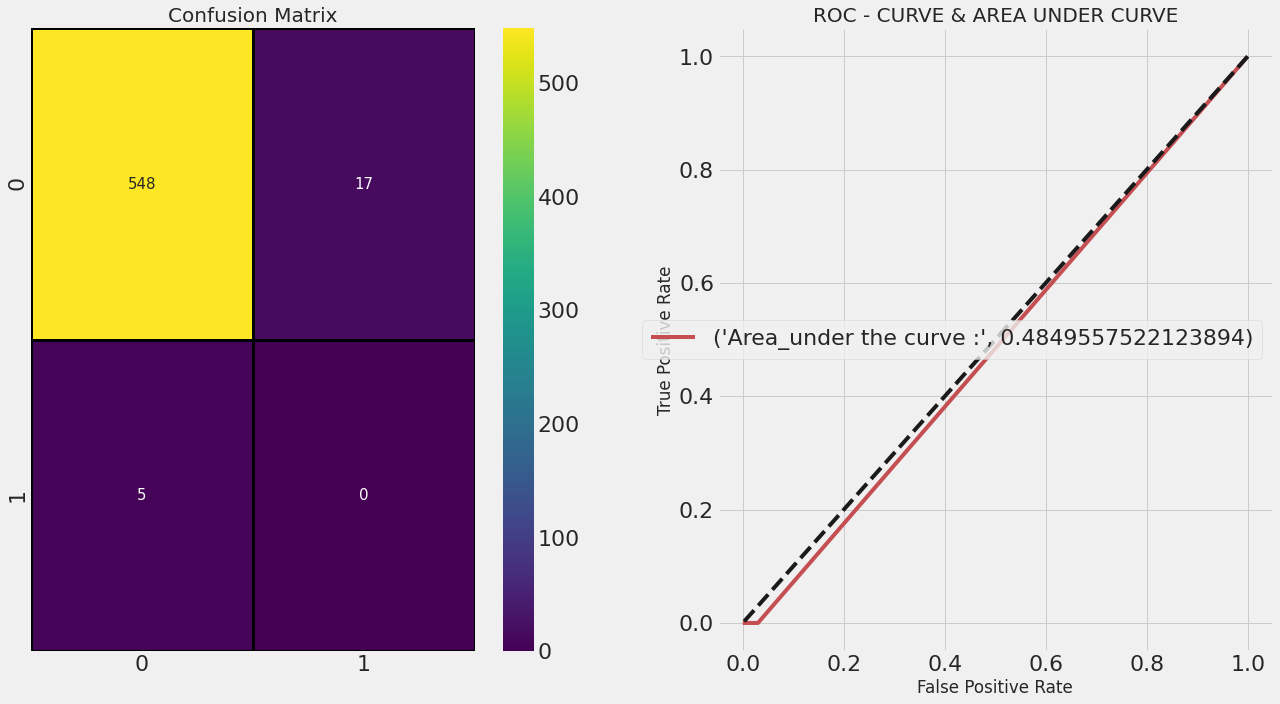

In [17]:
#Decision Tree Classifier
dtc_model = DecisionTreeClassifier(max_depth=5, random_state=13)
dtc_results = dtc_model.fit(train_fluxes,train_labels)

dtc_prediction = dtc_results.predict(test_fluxes)

print(f"Score: {dtc_results.score(test_fluxes,test_labels)}%\n")
print ("\nClassification report :\n",(classification_report(test_labels,dtc_prediction)))

#Plotting Results

fig, axs = plt.subplots(figsize = (18,10),ncols=2)

sns.heatmap(confusion_matrix(test_labels,dtc_prediction), cmap = "viridis", annot = True,fmt = "d",
            annot_kws = {'size':15},linewidths=3,linecolor="black", ax = axs[0])
axs[0].set_title("Confusion Matrix", size = 20)

#ROC curve and Area under the curve plotting
predicting_probabilites = dtc_model.predict_proba(test_fluxes)[:,1]
fpr,tpr,thresholds = roc_curve(test_labels,predicting_probabilites)
axs[1].plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
axs[1].plot([1,0],[1,0],linestyle = "dashed",color ="k")
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

plt.legend()
plt.tight_layout()

## Perceptron

The Accuracy of Logistic Regession is 0.9070175438596492

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.92      0.95       565
           1       0.00      0.00      0.00         5

    accuracy                           0.91       570
   macro avg       0.50      0.46      0.48       570
weighted avg       0.98      0.91      0.94       570



Text(0.5, 1.0, 'Confusion Matrix')

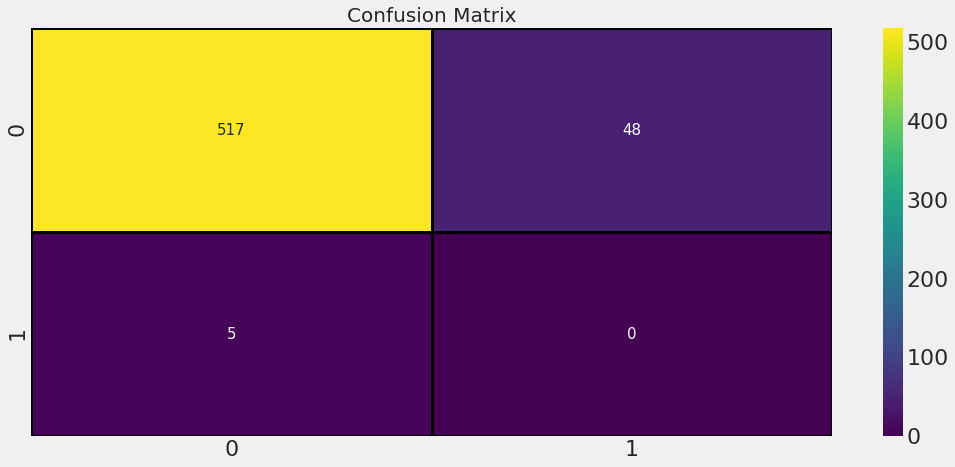

In [18]:
perception_model = Perceptron()
perception_results = perception_model.fit(train_fluxes, train_labels)

perception_pred = perception_results.predict(test_fluxes)
print(f"The Accuracy of Logistic Regession is {accuracy_score(perception_pred,test_labels)}")
print ("\nClassification report :\n",(classification_report(test_labels,perception_pred)))

#Plotting Results

fig, axs = plt.subplots(figsize = (16,7))
sns.heatmap(confusion_matrix(test_labels,perception_pred), cmap = "viridis", annot = True,fmt = "d",
            annot_kws = {'size':15},linewidths=3,linecolor="black", ax = axs)
axs.set_title("Confusion Matrix", size = 20)

## Logistic

/home/shield94/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/shield94/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shield94/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and 

The Accuracy of Logistic Regession is 0.9912280701754386

Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



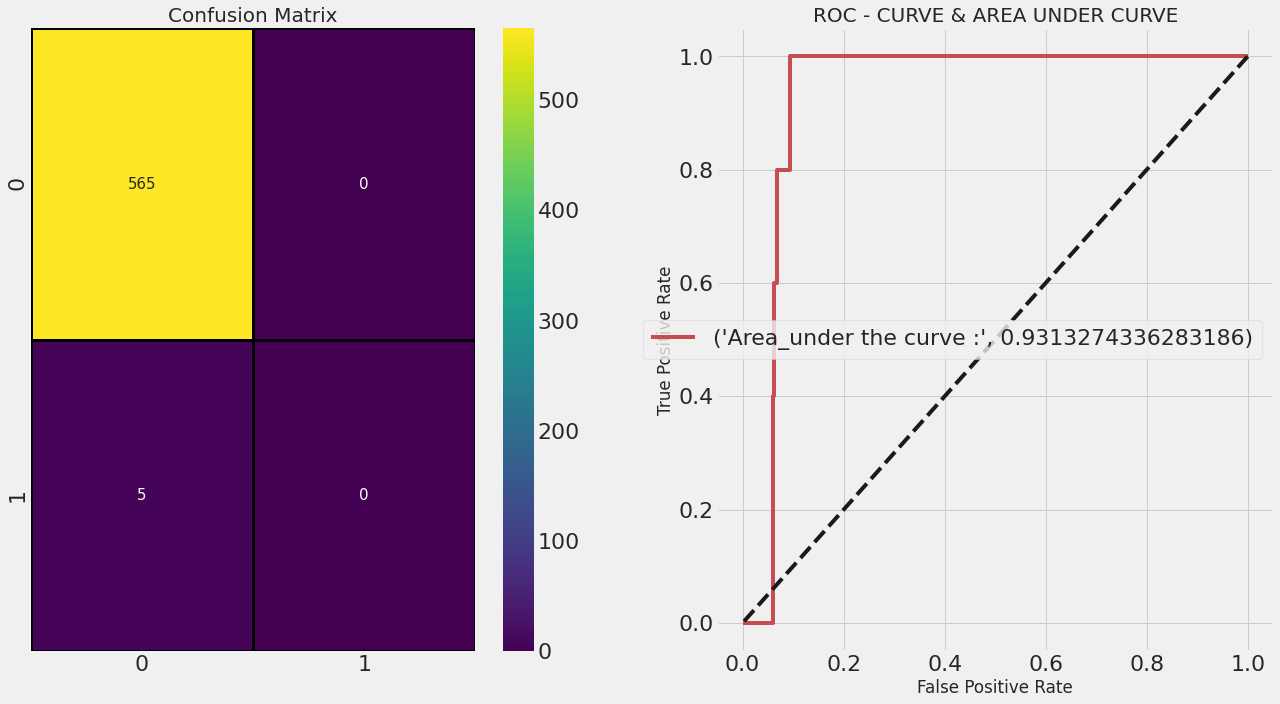

In [19]:
#Logistic
log_model = LogisticRegression()
log_model.fit(train_fluxes,train_labels)

log_pred = log_model.predict(test_fluxes)
print(f"The Accuracy of Logistic Regession is {accuracy_score(log_pred,test_labels)}")
print ("\nClassification report :\n",(classification_report(test_labels,log_pred)))

#Plotting Results

fig, axs = plt.subplots(figsize = (18,10),ncols=2)

sns.heatmap(confusion_matrix(test_labels,log_pred), cmap = "viridis", annot = True,fmt = "d",
            annot_kws = {'size':15},linewidths=3,linecolor="black", ax = axs[0])
axs[0].set_title("Confusion Matrix", size = 20)

#ROC curve and Area under the curve plotting
predicting_probabilites = log_model.predict_proba(test_fluxes)[:,1]
fpr,tpr,thresholds = roc_curve(test_labels,predicting_probabilites)
axs[1].plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
axs[1].plot([1,0],[1,0],linestyle = "dashed",color ="k")
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

plt.legend()
plt.tight_layout()

# Using SMOTE

In [20]:
model = SMOTE()

ov_train_x,ov_train_y = model.fit_resample(train_data.drop('NEW_LABEL',axis=1), train_data['NEW_LABEL'])
ov_train_y = ov_train_y.astype('int')

Text(0.5, 1.0, 'AFTER SMOTE')

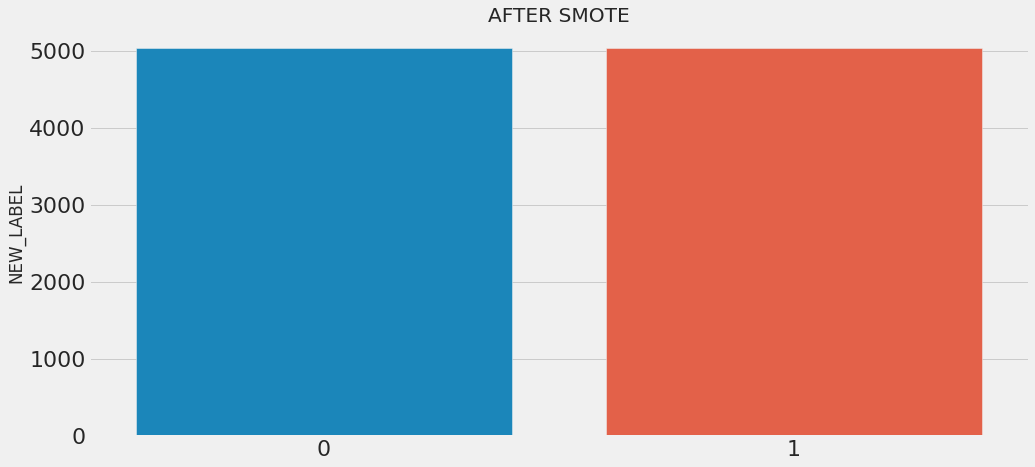

In [21]:
plt.figure(figsize =(15,7))
sns.barplot(y = ov_train_y.value_counts(), x = [0,1])
plt.title("AFTER SMOTE")

In [22]:
train_fluxes, test_fluxes, train_labels, test_labels = train_test_split(ov_train_x, ov_train_y, test_size=0.25, random_state=42)

## K Closest Neighbors

Score: 0.9845544554455445%


Classification report :
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1278
           1       0.97      1.00      0.98      1247

    accuracy                           0.98      2525
   macro avg       0.98      0.98      0.98      2525
weighted avg       0.99      0.98      0.98      2525



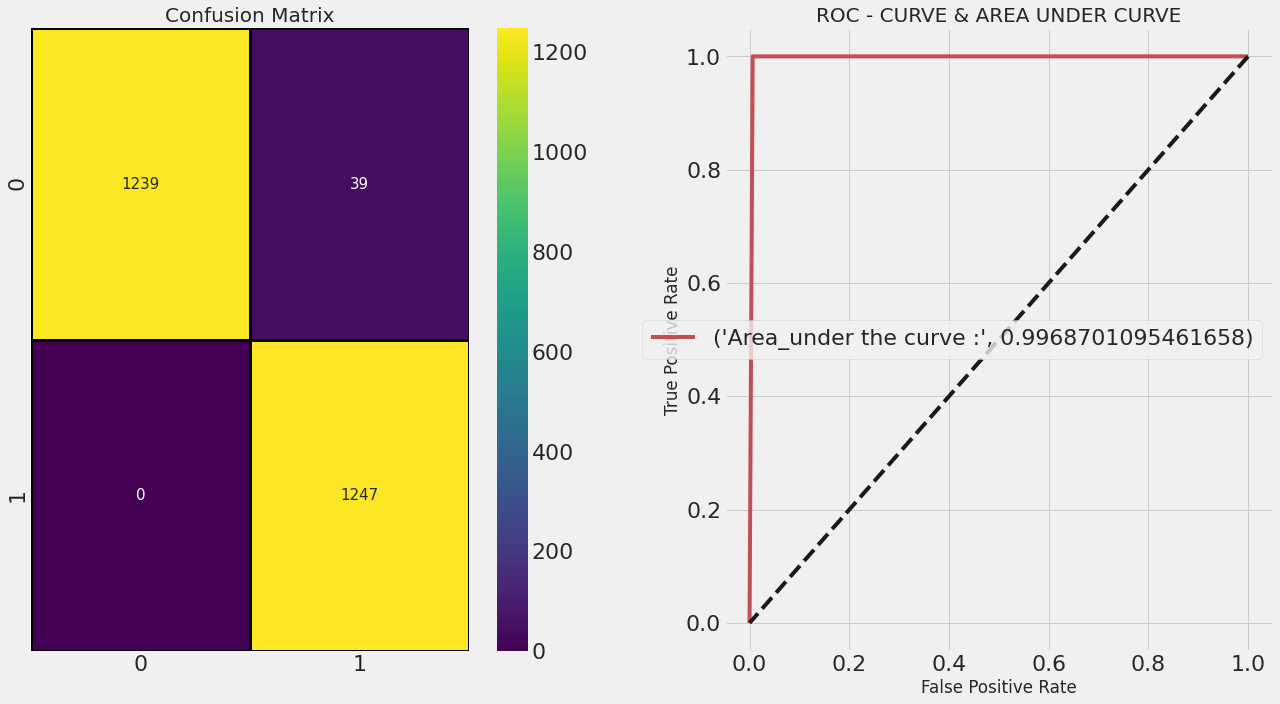

In [23]:
#K closest neighbors
knn_model = KNeighborsClassifier()
knn_results = knn_model.fit(train_fluxes,train_labels)

knn_prediction = knn_results.predict(test_fluxes)

print(f"Score: {knn_results.score(test_fluxes,test_labels)}%\n")
print ("\nClassification report :\n",(classification_report(test_labels,knn_prediction)))

#Plotting Results

fig, axs = plt.subplots(figsize = (18,10),ncols=2)

sns.heatmap(confusion_matrix(test_labels,knn_prediction), cmap = "viridis", annot = True,fmt = "d",
            annot_kws = {'size':15},linewidths=3,linecolor="black", ax = axs[0])
axs[0].set_title("Confusion Matrix", size = 20)

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_model.predict_proba(test_fluxes)[:,1]
fpr,tpr,thresholds = roc_curve(test_labels,predicting_probabilites)
axs[1].plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
axs[1].plot([1,0],[1,0],linestyle = "dashed",color ="k")
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

plt.legend()
plt.tight_layout()

## Decision Tree Classifier

Score: 0.9271287128712872%


Classification report :
               precision    recall  f1-score   support

           0       0.98      0.87      0.92      1278
           1       0.88      0.99      0.93      1247

    accuracy                           0.93      2525
   macro avg       0.93      0.93      0.93      2525
weighted avg       0.93      0.93      0.93      2525



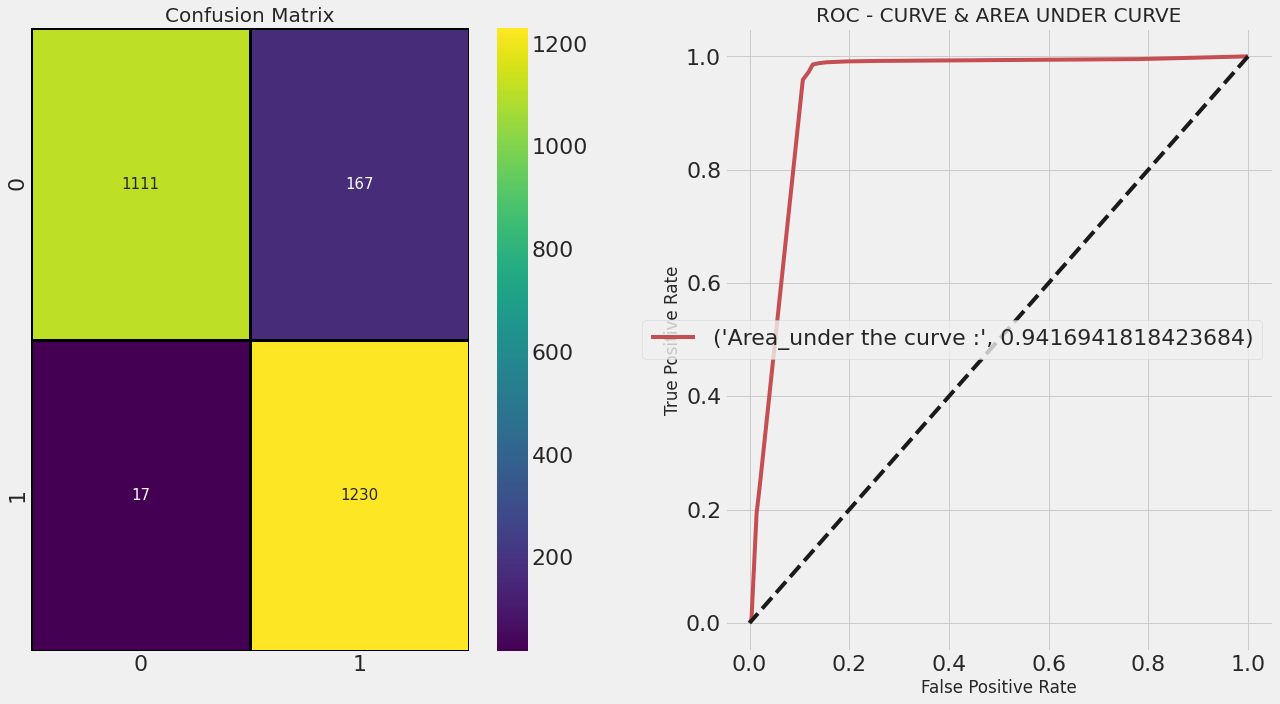

In [24]:
#Decision Tree Classifier
dtc_model = DecisionTreeClassifier(max_depth=5, random_state=13)
dtc_results = dtc_model.fit(train_fluxes,train_labels)

dtc_prediction = dtc_results.predict(test_fluxes)

print(f"Score: {dtc_results.score(test_fluxes,test_labels)}%\n")
print ("\nClassification report :\n",(classification_report(test_labels,dtc_prediction)))

#Plotting Results

fig, axs = plt.subplots(figsize = (18,10),ncols=2)

sns.heatmap(confusion_matrix(test_labels,dtc_prediction), cmap = "viridis", annot = True,fmt = "d",
            annot_kws = {'size':15},linewidths=3,linecolor="black", ax = axs[0])
axs[0].set_title("Confusion Matrix", size = 20)

#ROC curve and Area under the curve plotting
predicting_probabilites = dtc_model.predict_proba(test_fluxes)[:,1]
fpr,tpr,thresholds = roc_curve(test_labels,predicting_probabilites)
axs[1].plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
axs[1].plot([1,0],[1,0],linestyle = "dashed",color ="k")
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

plt.legend()
plt.tight_layout()

## Perception

The Accuracy of Logistic Regession is 0.7592079207920792

Classification report :
               precision    recall  f1-score   support

           0       0.89      0.60      0.72      1278
           1       0.69      0.93      0.79      1247

    accuracy                           0.76      2525
   macro avg       0.79      0.76      0.75      2525
weighted avg       0.79      0.76      0.75      2525



Text(0.5, 1.0, 'Confusion Matrix')

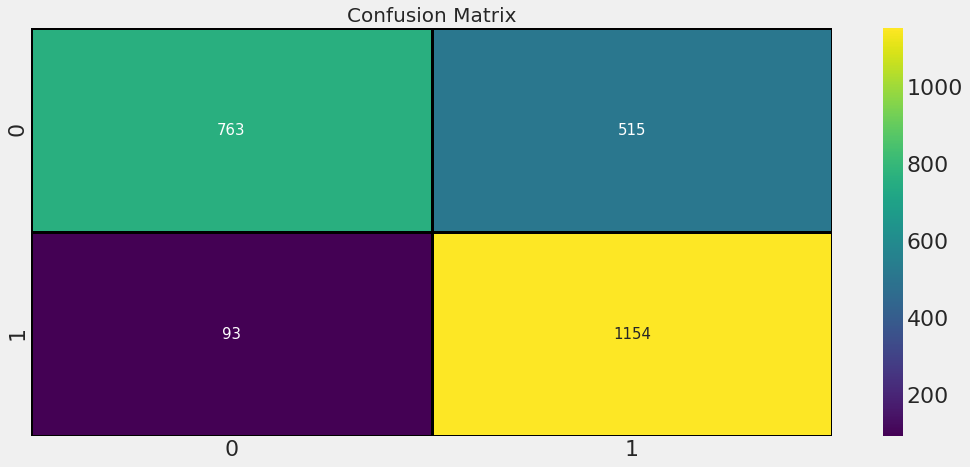

In [25]:
#Perception
perception_model = Perceptron()
perception_results = perception_model.fit(train_fluxes, train_labels)

perception_pred = perception_results.predict(test_fluxes)
print(f"The Accuracy of Logistic Regession is {accuracy_score(perception_pred,test_labels)}")
print ("\nClassification report :\n",(classification_report(test_labels,perception_pred)))

#Plotting Results

fig, axs = plt.subplots(figsize = (16,7))
sns.heatmap(confusion_matrix(test_labels,perception_pred), cmap = "viridis", annot = True,fmt = "d",
            annot_kws = {'size':15},linewidths=3,linecolor="black", ax = axs)
axs.set_title("Confusion Matrix", size = 20)

## Logistic

/home/shield94/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Accuracy of Logistic Regession is 0.7362376237623762

Classification report :
               precision    recall  f1-score   support

           0       0.79      0.65      0.71      1278
           1       0.70      0.82      0.76      1247

    accuracy                           0.74      2525
   macro avg       0.74      0.74      0.73      2525
weighted avg       0.74      0.74      0.73      2525



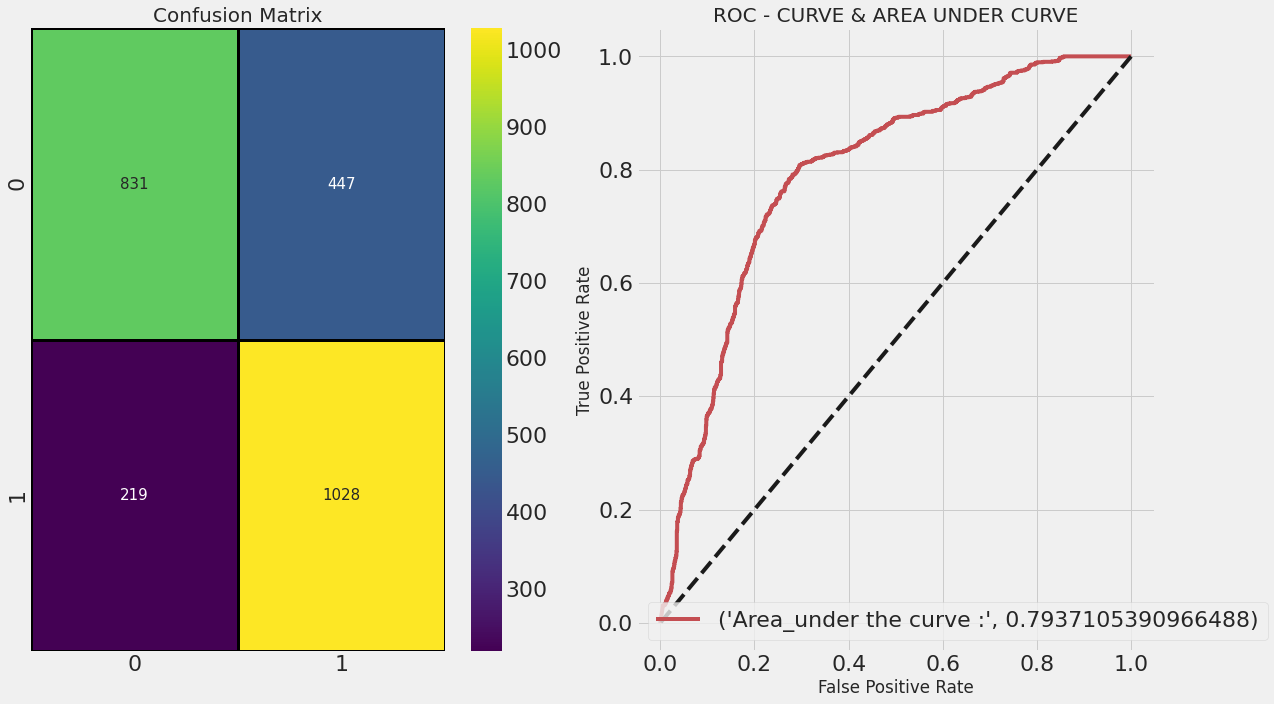

In [26]:
#Logistic
log_model = LogisticRegression(class_weight={0:100, 1:1})
log_model.fit(train_fluxes,train_labels)

log_pred = log_model.predict(test_fluxes)
print(f"The Accuracy of Logistic Regession is {accuracy_score(log_pred,test_labels)}")
print ("\nClassification report :\n",(classification_report(test_labels,log_pred)))

#Plotting Results

fig, axs = plt.subplots(figsize = (18,10),ncols=2)

sns.heatmap(confusion_matrix(test_labels,log_pred), cmap = "viridis", annot = True,fmt = "d",
            annot_kws = {'size':15},linewidths=3,linecolor="black", ax = axs[0])
axs[0].set_title("Confusion Matrix", size = 20)

#ROC curve and Area under the curve plotting
predicting_probabilites = log_model.predict_proba(test_fluxes)[:,1]
fpr,tpr,thresholds = roc_curve(test_labels,predicting_probabilites)
axs[1].plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
axs[1].plot([1,0],[1,0],linestyle = "dashed",color ="k")
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

plt.legend()
plt.tight_layout()